In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
def explore(dataframe):
    # Shape
    print("Total Records: ", dataframe.shape[0])
          
    #Check Missing/Null
    x = dataframe.columns[dataframe.isnull().any()].tolist()   
    if not x:
        print("No Missing/Null Records")
    else:        
        print("Found Missing Records")

In [4]:
explore(red_wine)

Total Records:  1599
No Missing/Null Records


In [5]:
red_wine.shape

(1599, 12)

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
red_wine['good'] = (red_wine['quality'] >= 6).astype(int)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Найдем выбросы

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/3775588395.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_wine['quality'])


<Axes: ylabel='Density'>

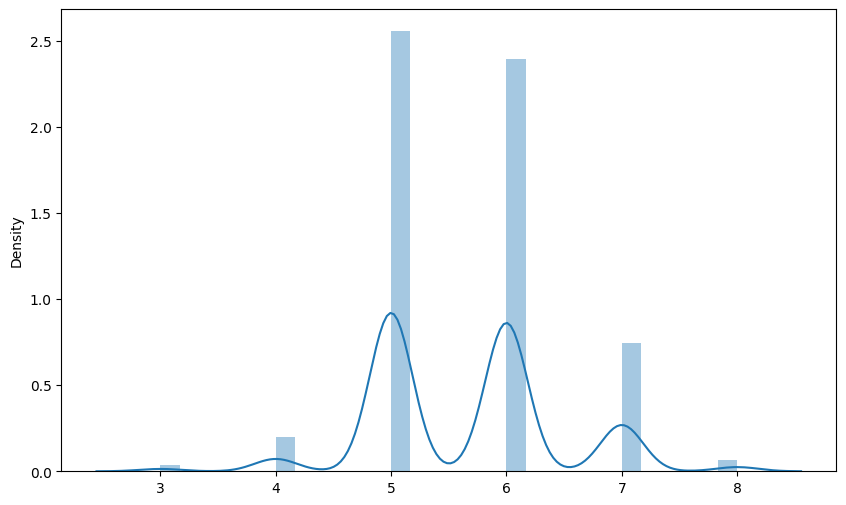

In [10]:
rcParams['figure.figsize'] = 10, 6
#%config InlineBackend.figure_format = 'svg'

sns.distplot(x=red_wine['quality'])

In [11]:
percentile_25 = np.percentile(red_wine['quality'], 25)
percentile_75 = np.percentile(red_wine['quality'], 75)

print("25 percentile:", percentile_25)
print("75 percentile:", percentile_75)

25 percentile: 5.0
75 percentile: 6.0


In [12]:
delta = 1.5 * (percentile_75 - percentile_25)
delta

1.5

Вычислим верхнюю и нижнюю границы диапазона допустимых значений

In [13]:
lower = percentile_25 - delta
lower

3.5

In [14]:
upper = percentile_75 + delta
upper

7.5

Найдем и удалим выборсы 

In [15]:
delete_rows = red_wine[(lower >= red_wine['quality']) | (red_wine['quality'] >= upper)]
delete_rows.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,1
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,1
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,1
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,1
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,1


In [16]:
print("Количество найденных выбросов:", delete_rows.shape[0])

Количество найденных выбросов: 28


In [17]:
red_cleaned = red_wine.drop(delete_rows.index)
red_cleaned.shape

(1571, 13)

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/2320939298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned['quality']);


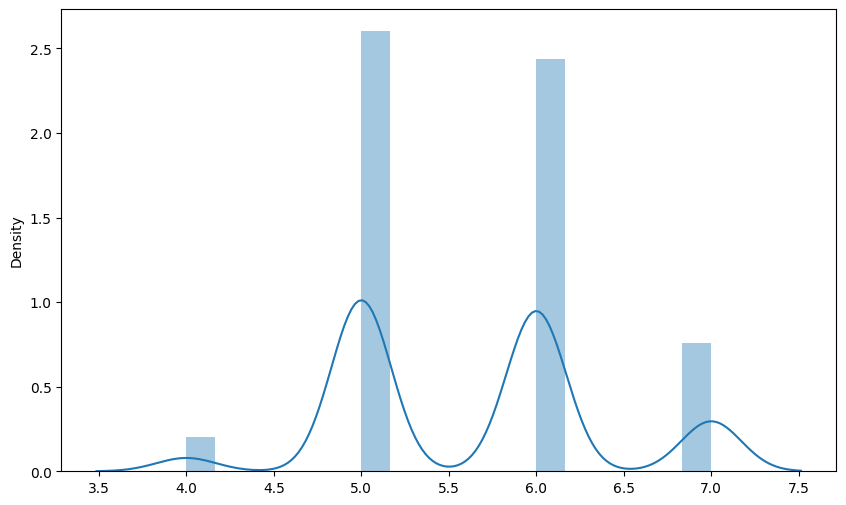

In [18]:
sns.distplot(x=red_cleaned['quality']);

Исследуем бинарные классы

<Axes: title={'center': 'Распределение бинарных классов'}, xlabel='good', ylabel='count'>

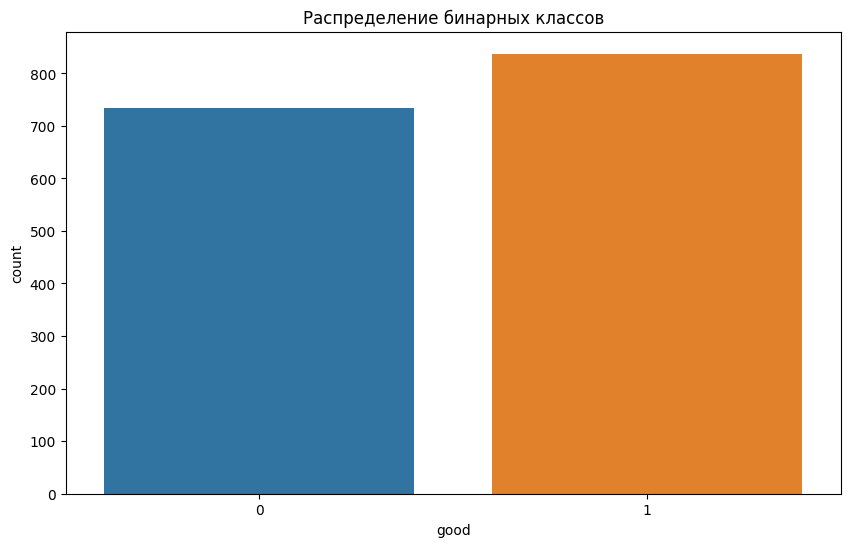

In [19]:
plt.title("Распределение бинарных классов")
sns.countplot(x='good', data=red_cleaned)

In [20]:
balance = red_cleaned['good'].value_counts()
balance

1    837
0    734
Name: good, dtype: int64

In [21]:
total = np.sum(balance)
zero = balance[0] / total
one = balance[1] / total
print("Доля от 0:", zero)
print("Доля от 1:", one)

Доля от 0: 0.4672183322724379
Доля от 1: 0.5327816677275621


Медиана

In [22]:
red_cleaned.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
good                     1.00000
dtype: float64

Посмотрим на график с усами признака качества без выбросов 

<Axes: >

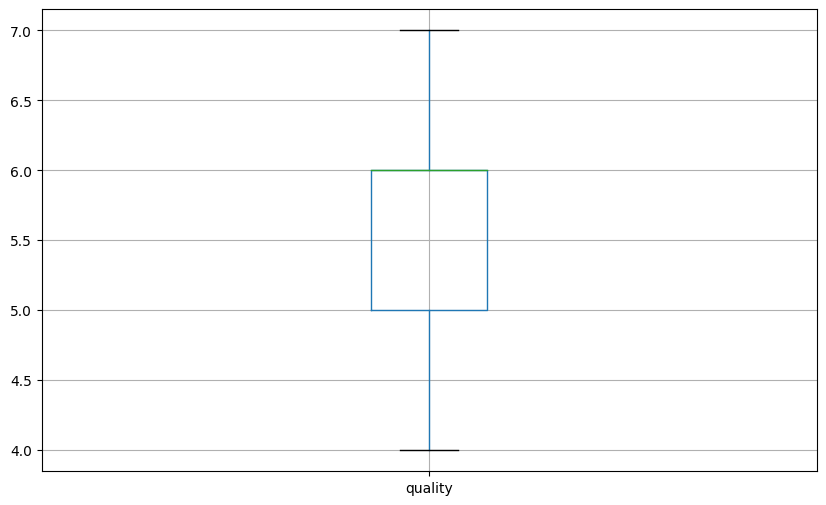

In [23]:
red_cleaned.boxplot(column='quality')

Рассмотрим все графики распределений

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


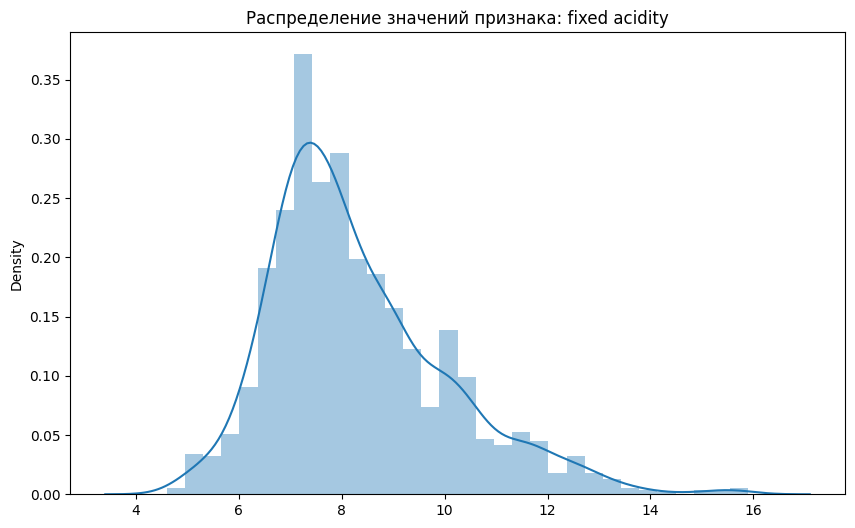

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


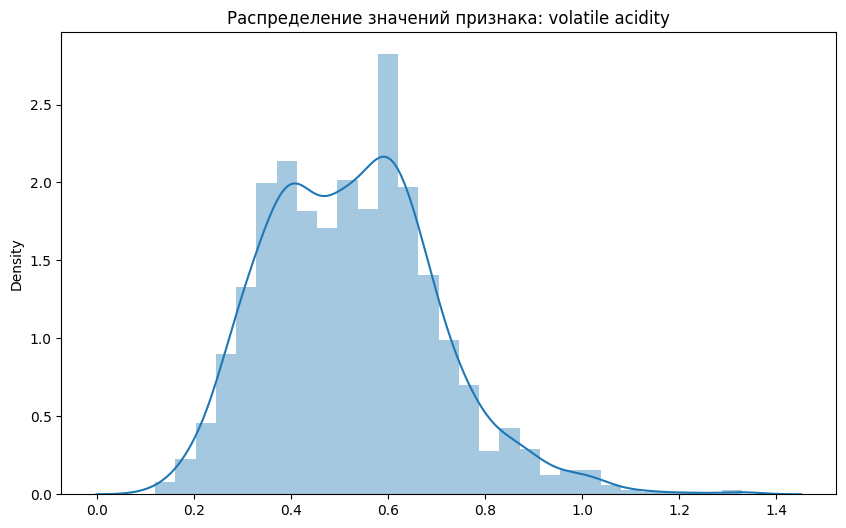

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


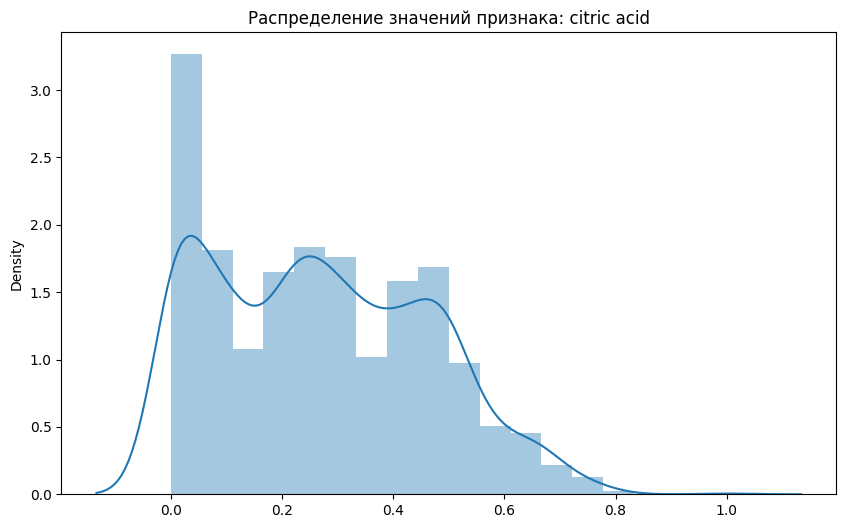

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


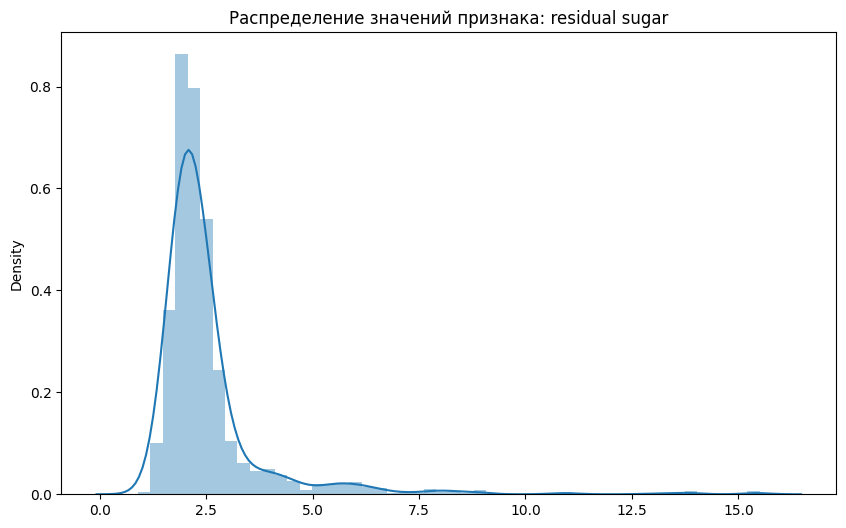

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


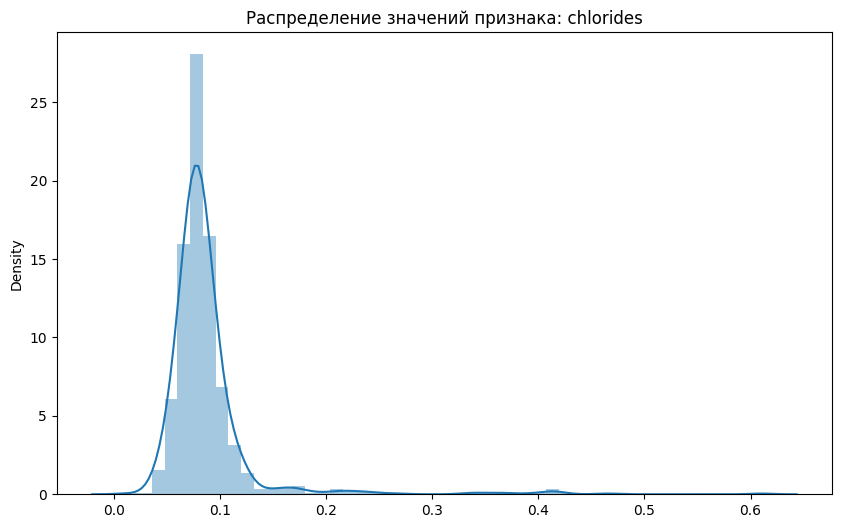

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


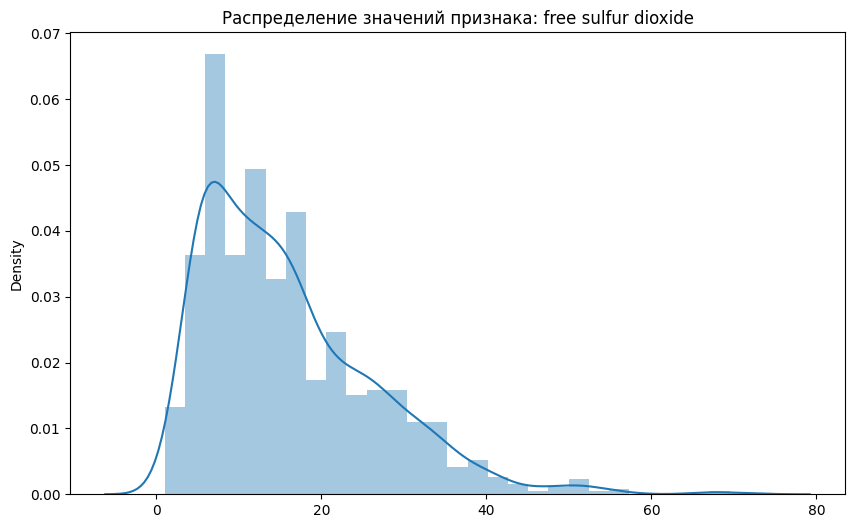

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


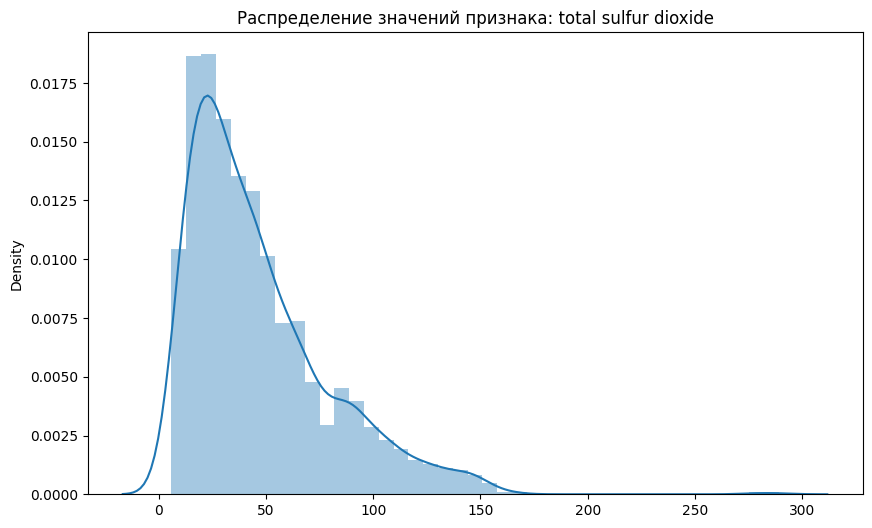

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


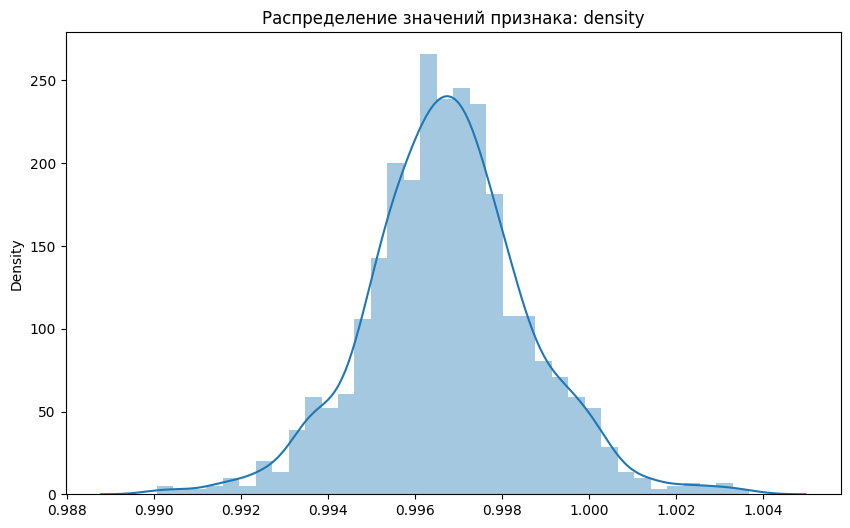

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


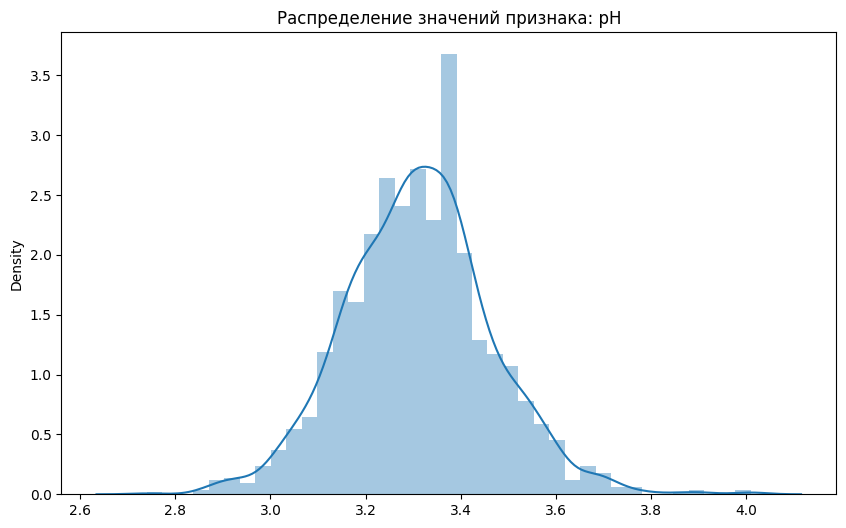

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


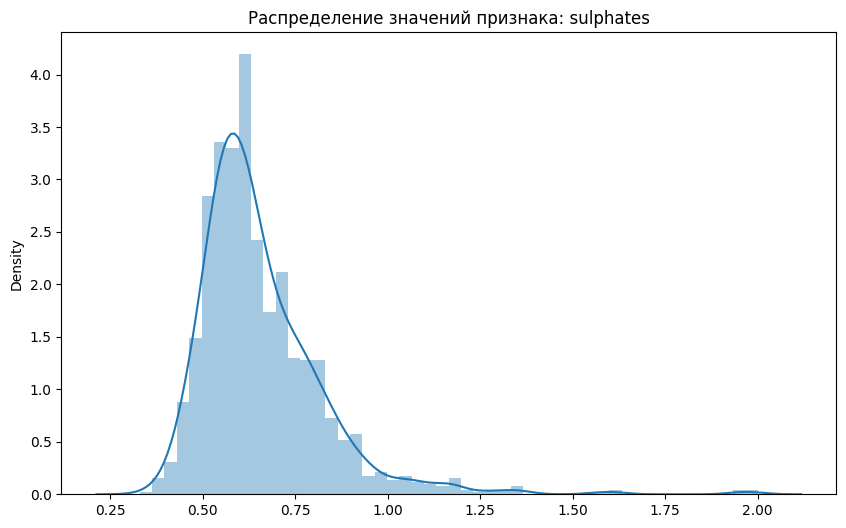

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


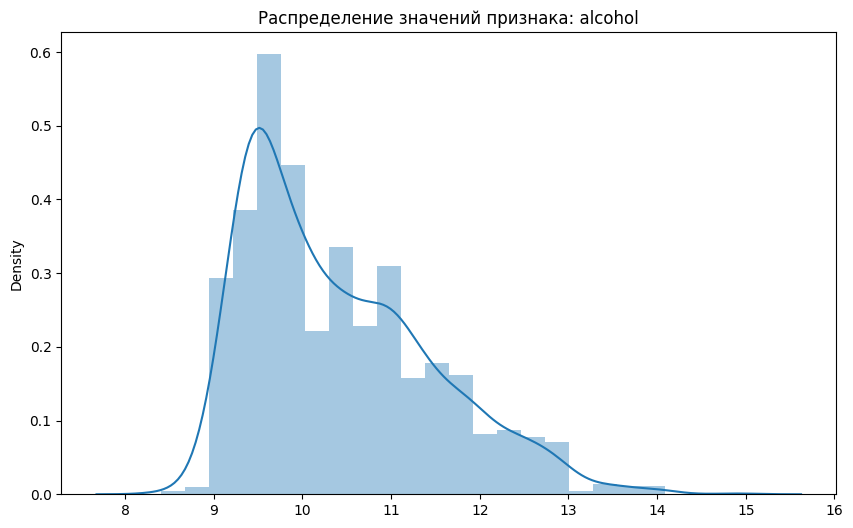

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


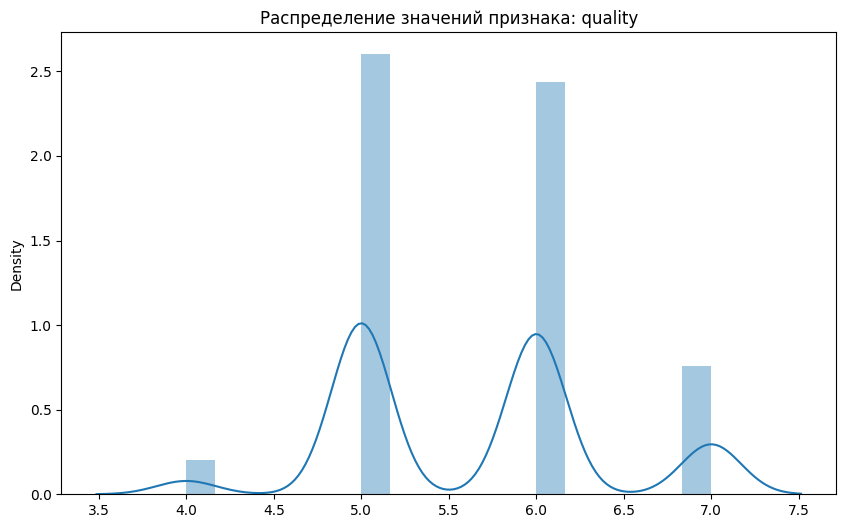

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4071553567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=red_cleaned[column])


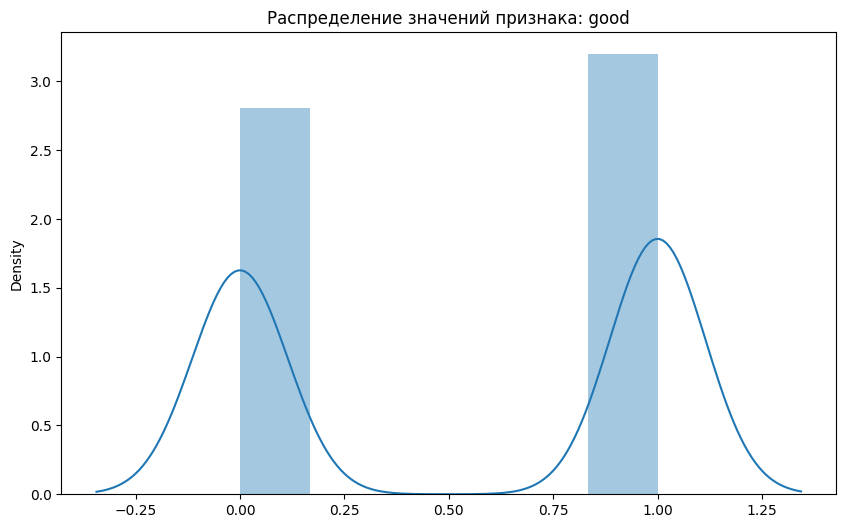

In [24]:
for column in red_cleaned.columns:
  plt.title("Распределение значений признака: " + column)
  sns.distplot(x=red_cleaned[column])
  plt.show()

Рассмотрим корреляции

In [25]:
red_cleaned.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.254979,0.668055,0.112726,0.093603,-0.153287,-0.110548,0.668446,-0.681691,0.185738,-0.056086,0.132455,0.095608
volatile acidity,-0.254979,1.000000,-0.550466,-0.000938,0.054441,-0.002193,0.084952,0.023945,0.223166,-0.252713,-0.208159,-0.371912,-0.313304
citric acid,0.668055,-0.550466,1.000000,0.144541,0.210872,-0.058883,0.039963,0.365142,-0.536324,0.311397,0.111581,0.216625,0.152509
residual sugar,0.112726,-0.000938,0.144541,1.000000,0.058815,0.196394,0.210238,0.355289,-0.087517,0.006907,0.038797,0.015644,-0.002028
chlorides,0.093603,0.054441,0.210872,0.058815,1.000000,0.005713,0.050730,0.200790,-0.269856,0.382763,-0.216637,-0.110691,-0.101997
free sulfur dioxide,-0.153287,-0.002193,-0.058883,0.196394,0.005713,1.000000,0.666647,-0.016526,0.070912,0.052165,-0.072443,-0.057308,-0.063396
total sulfur dioxide,-0.110548,0.084952,0.039963,0.210238,0.050730,0.666647,1.000000,0.076190,-0.070018,0.043404,-0.209803,-0.203880,-0.235628
density,0.668446,0.023945,0.365142,0.355289,0.200790,-0.016526,0.076190,1.000000,-0.341393,0.157177,-0.489172,-0.155828,-0.151687
pH,-0.681691,0.223166,-0.536324,-0.087517,-0.269856,0.070912,-0.070018,-0.341393,1.000000,-0.196786,0.205099,-0.040834,0.003572
sulphates,0.185738,-0.252713,0.311397,0.006907,0.382763,0.052165,0.043404,0.157177,-0.196786,1.000000,0.086381,0.241592,0.211075


In [26]:
explore(white_wine)

Total Records:  4898
No Missing/Null Records


In [27]:
white_wine.shape

(4898, 12)

In [28]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [31]:
white_wine['good'] = (white_wine['quality'] >= 6).astype(int)
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


# Найдем выбросы

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/2452951180.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_wine['quality'])


<Axes: ylabel='Density'>

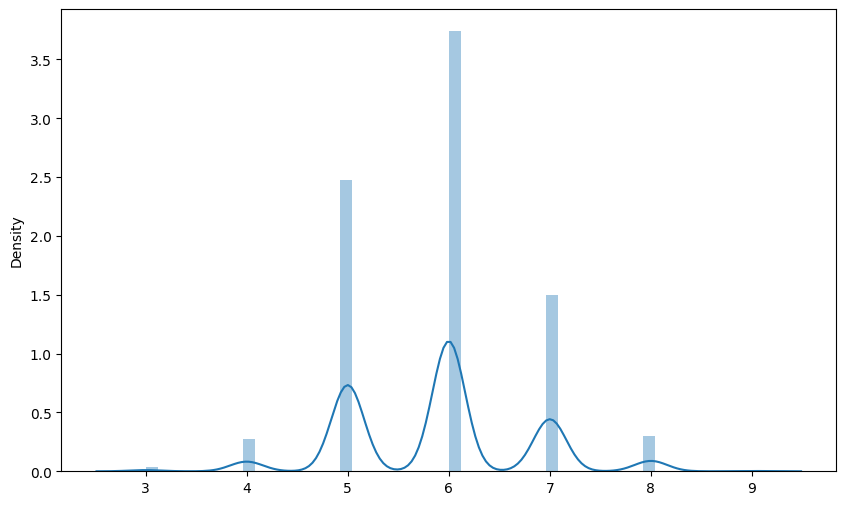

In [32]:
rcParams['figure.figsize'] = 10, 6
#%config InlineBackend.figure_format = 'svg'

sns.distplot(x=white_wine['quality'])

In [33]:
percentile_25 = np.percentile(white_wine['quality'], 25)
percentile_75 = np.percentile(white_wine['quality'], 75)

print("25 percentile:", percentile_25)
print("75 percentile:", percentile_75)

25 percentile: 5.0
75 percentile: 6.0


In [34]:
delta = 1.5 * (percentile_75 - percentile_25)
delta

1.5

Вычислим верхнюю и нижнюю границу диапазона допустимых значений

In [35]:
lower = percentile_25 - delta
lower

3.5

In [36]:
upper = percentile_75 + delta
upper

7.5

Найдем и удалим выбросы

In [37]:
delete_rows = white_wine[(lower >= white_wine['quality']) | (white_wine['quality'] >= upper)]
delete_rows.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1
22,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8,1
68,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8,1
74,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8,1


In [38]:
print("Количество найденных выбросов:", delete_rows.shape[0])

Количество найденных выбросов: 200


In [39]:
white_cleaned = white_wine.drop(delete_rows.index)
white_cleaned.shape

(4698, 13)

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/3841260698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned['quality']);


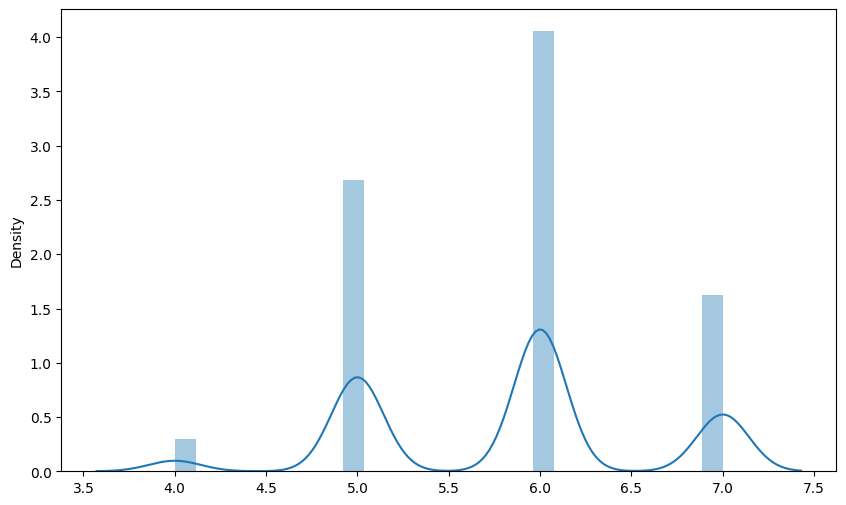

In [40]:
sns.distplot(x=white_cleaned['quality']);

<Axes: title={'center': 'Распределение бинарных классов'}, xlabel='good', ylabel='count'>

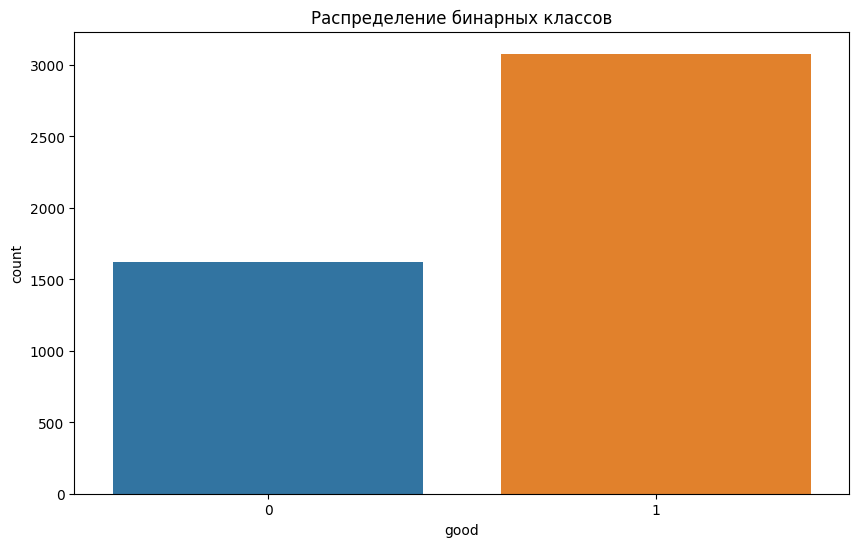

In [41]:
plt.title("Распределение бинарных классов")
sns.countplot(x='good', data=white_cleaned)

In [42]:
balance = white_cleaned['good'].value_counts()
balance

1    3078
0    1620
Name: good, dtype: int64

In [43]:
total = np.sum(balance)
zero = balance[0] / total
one = balance[1] / total
print("Доля от 0:", zero)
print("Доля от 1:", one)

Доля от 0: 0.3448275862068966
Доля от 1: 0.6551724137931034


Медиана

In [44]:
white_cleaned.median()

fixed acidity             6.8000
volatile acidity          0.2600
citric acid               0.3200
residual sugar            5.2000
chlorides                 0.0430
free sulfur dioxide      34.0000
total sulfur dioxide    135.0000
density                   0.9938
pH                        3.1800
sulphates                 0.4800
alcohol                  10.3000
quality                   6.0000
good                      1.0000
dtype: float64

Посмотрим график с усами без выбросов

<Axes: >

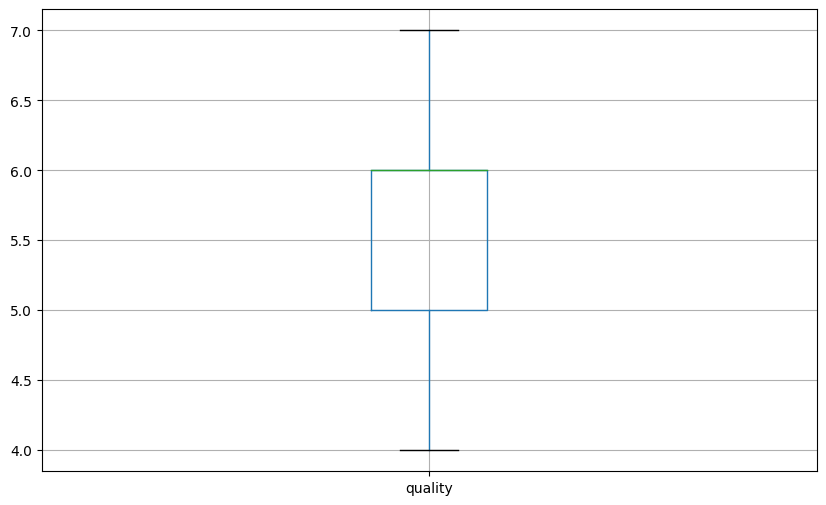

In [45]:
white_cleaned.boxplot(column='quality')

Рассмотрим графики распределений

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


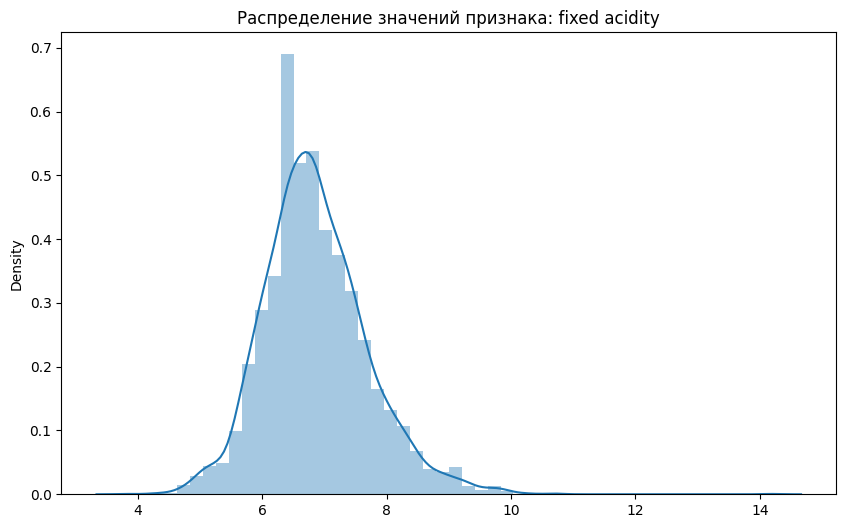

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


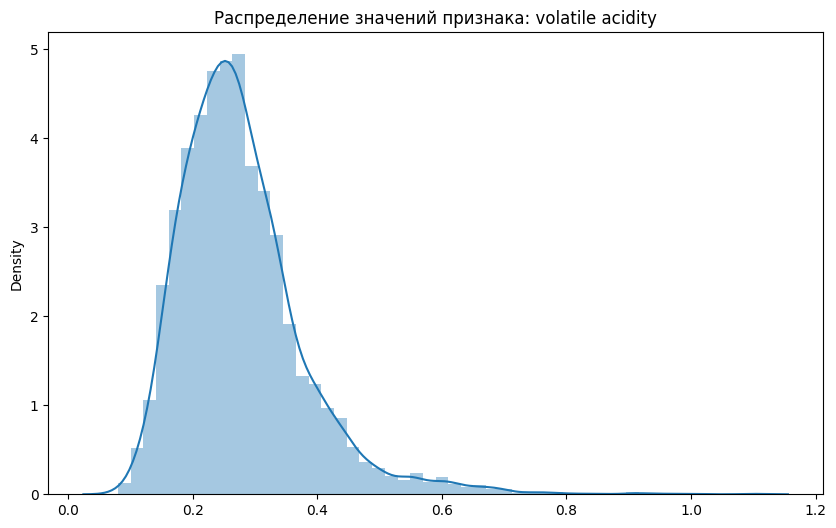

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


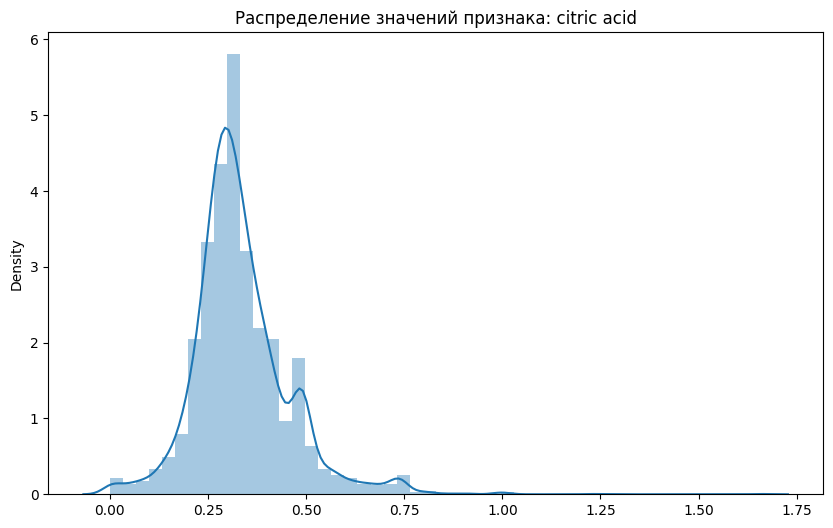

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


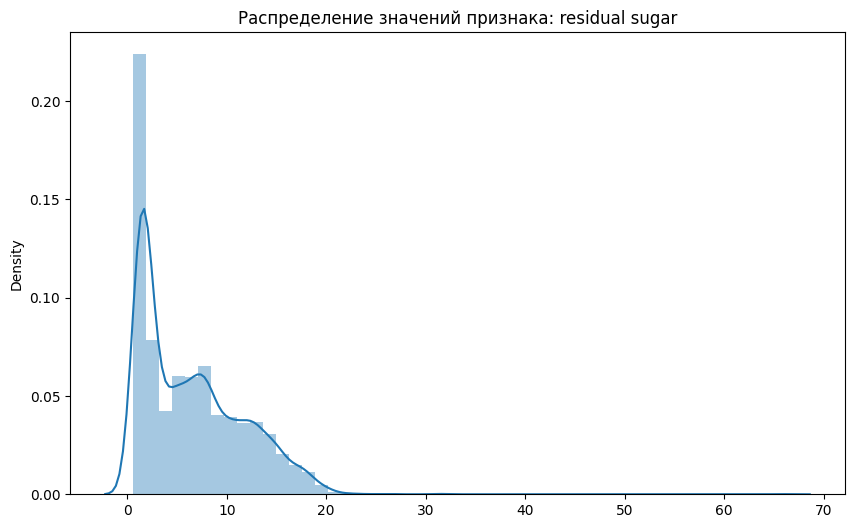

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


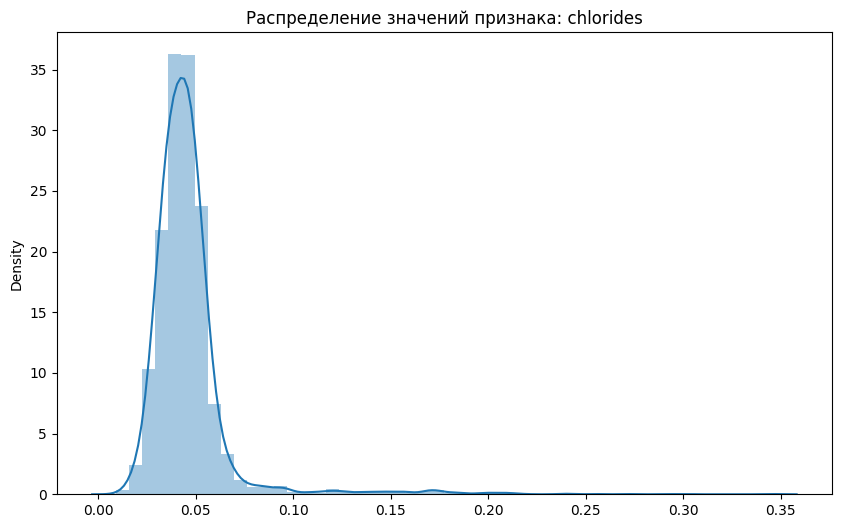

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


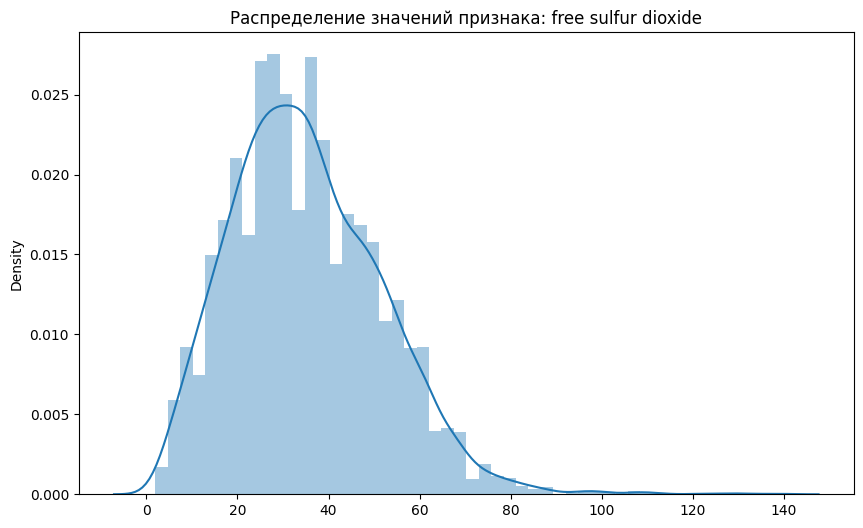

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


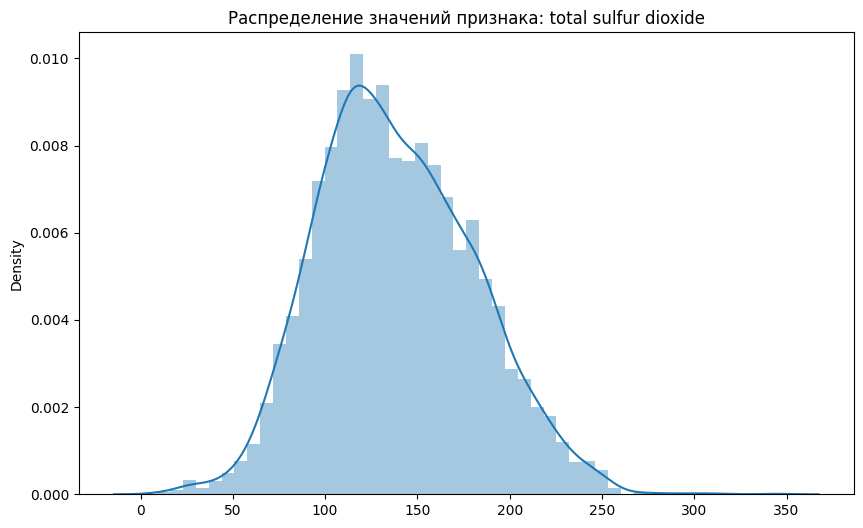

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


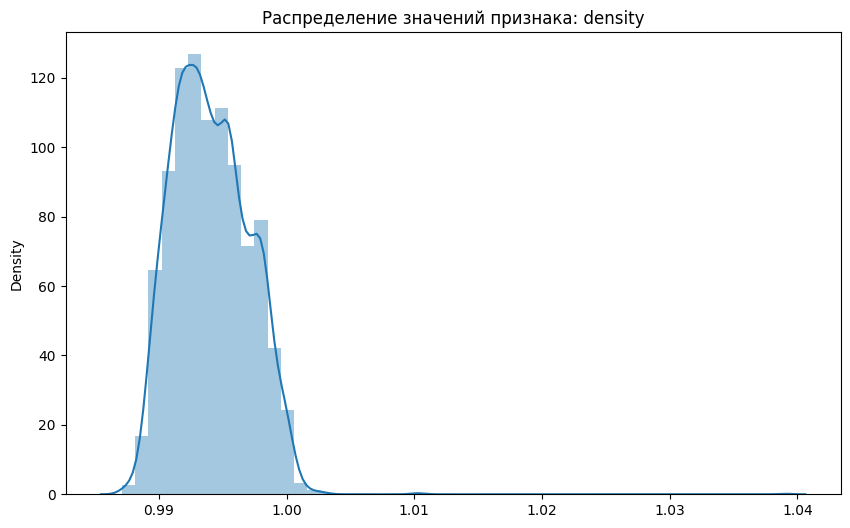

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


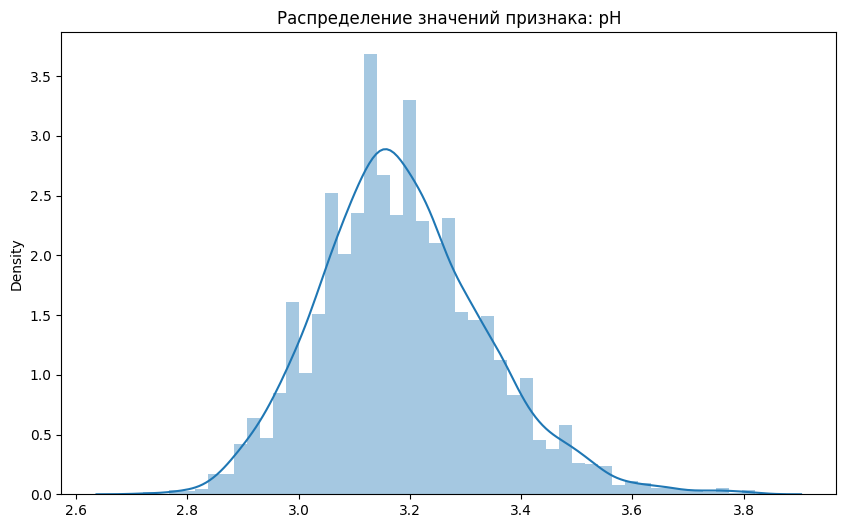

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


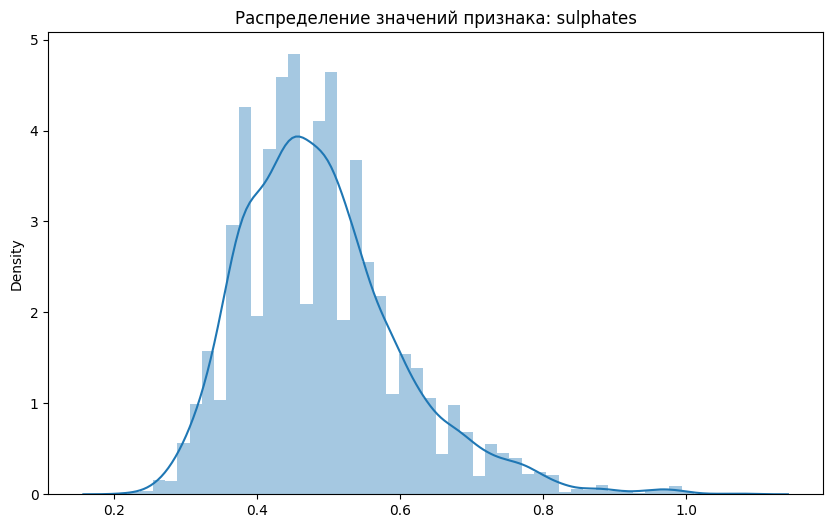

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


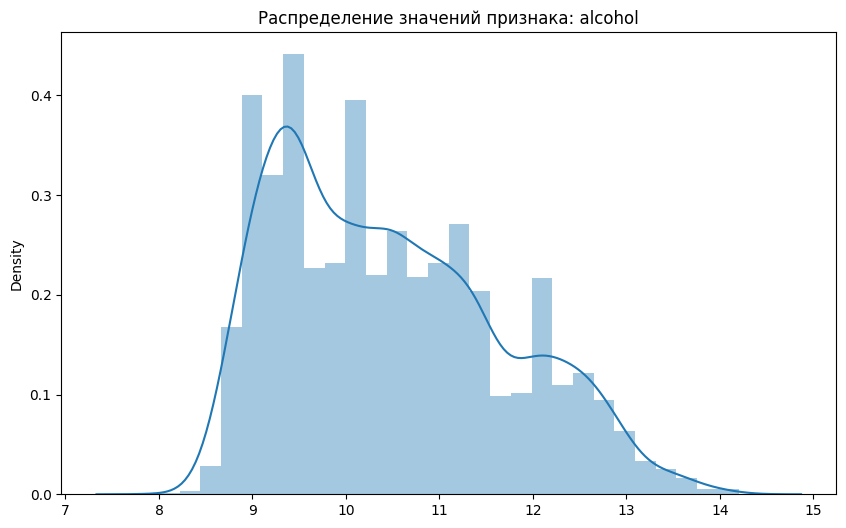

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


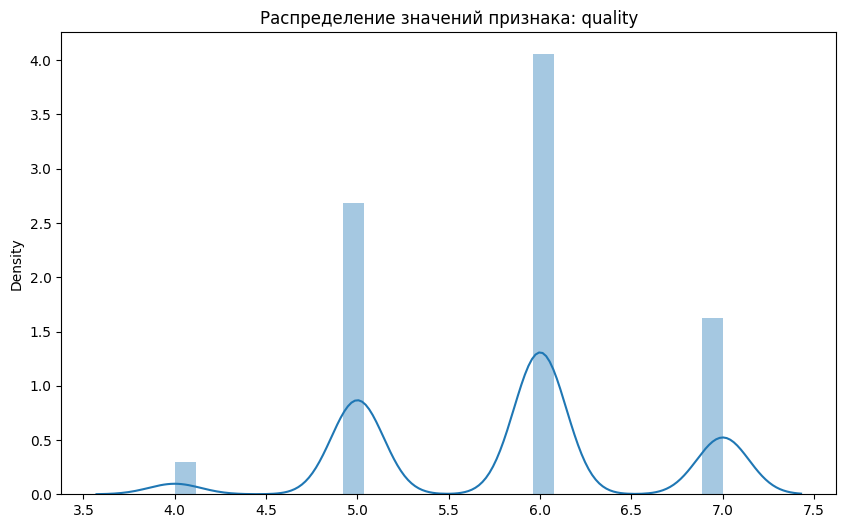

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_36468/4118302634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=white_cleaned[column])


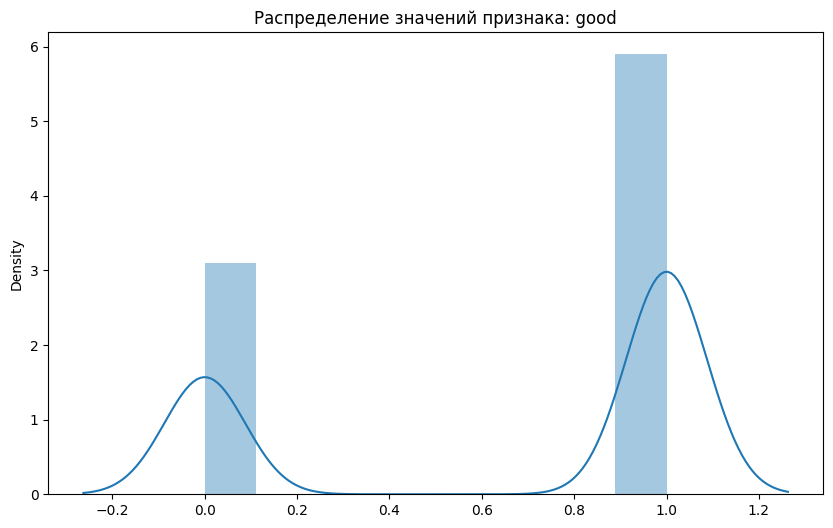

In [46]:
for column in white_cleaned.columns:
  plt.title("Распределение значений признака: " + column)
  sns.distplot(x=white_cleaned[column])
  plt.show()

Рассмотрим корреляции признаков

In [47]:
white_cleaned.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.022536,0.292890,0.079677,0.012493,-0.049627,0.086163,0.251346,-0.420924,-0.011071,-0.103281,-0.100975,-0.082583
volatile acidity,-0.022536,1.000000,-0.151540,0.071323,0.073521,-0.098130,0.094481,0.040669,-0.033959,-0.031325,0.050554,-0.224850,-0.231186
citric acid,0.292890,-0.151540,1.000000,0.096064,0.117577,0.106272,0.127174,0.152206,-0.170498,0.065995,-0.078580,-0.005876,0.000739
residual sugar,0.079677,0.071323,0.096064,1.000000,0.080959,0.320238,0.405155,0.843236,-0.184317,-0.020282,-0.452584,-0.098911,-0.091356
chlorides,0.012493,0.073521,0.117577,0.080959,1.000000,0.106430,0.191569,0.245586,-0.081737,0.013073,-0.352654,-0.204148,-0.177810
free sulfur dioxide,-0.049627,-0.098130,0.106272,0.320238,0.106430,1.000000,0.613074,0.315003,-0.007581,0.050471,-0.269225,0.018423,0.002829
total sulfur dioxide,0.086163,0.094481,0.127174,0.405155,0.191569,0.613074,1.000000,0.533430,0.005657,0.136882,-0.454369,-0.165079,-0.165301
density,0.251346,0.040669,0.152206,0.843236,0.245586,0.315003,0.533430,1.000000,-0.080023,0.078063,-0.774001,-0.296261,-0.260805
pH,-0.420924,-0.033959,-0.170498,-0.184317,-0.081737,-0.007581,0.005657,-0.080023,1.000000,0.149926,0.111049,0.094023,0.080762
sulphates,-0.011071,-0.031325,0.065995,-0.020282,0.013073,0.050471,0.136882,0.078063,0.149926,1.000000,-0.015462,0.067016,0.054572
